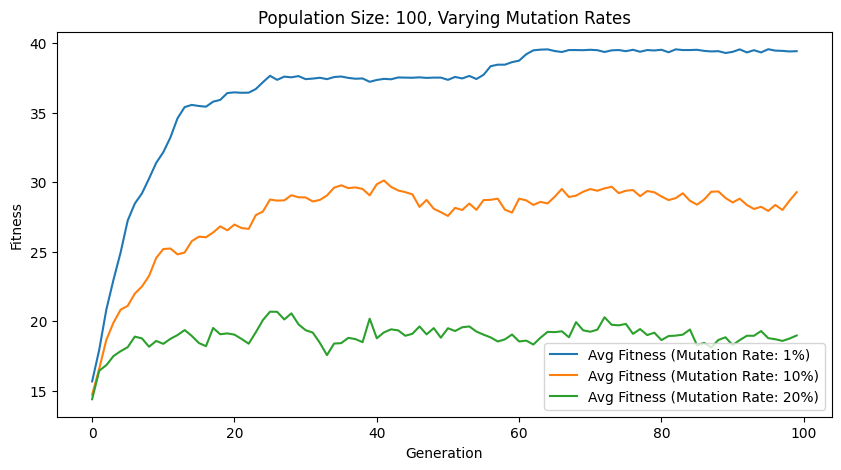

In [47]:
import random
import matplotlib.pyplot as plt

# Parameters
bases = ['A', 'T', 'G', 'C']
mutationRate = 100  # Mutation rate in percentage
genomeLength = 50
popSize = 100  # Population size

class indiv(object):
    """Individual class representing a genome and its fitness."""

    def __init__(self):  # Constructor
        self.fitness = 0
        self.genome = []
        for i in range(0, genomeLength):
            self.genome.append(random.choice(bases))

    def mutate(self):
        """Mutate a single base in the genome."""
        self.genome[random.randint(0, len(self.genome) - 1)] = random.choice(bases)

    def mutate2(self):
        """Mutate each base in the genome with a given probability."""
        for i in range(len(self.genome)):
            if random.random() < (mutationRate / 100):
                self.genome[i] = random.choice(bases)

    def crossover(self, other):
        """Perform single-point crossover with another individual."""
        crossPoint = random.randint(1, len(self.genome) - 1)
        for i in range(crossPoint, len(self.genome)):
            temp = self.genome[i]
            self.genome[i] = other.genome[i]
            other.genome[i] = temp

    def calcFitness(self):
        """Calculate the fitness of the individual."""
        self.fitness = 0
        for i in range(len(self.genome) - 1):
            if self.genome[i] == self.genome[i + 1]:
                self.fitness += 1

    def print(self):
        """Print the genome and fitness."""
        print(self.genome)
        print("fitness=", self.fitness)

    def __str__(self):
        return str(self.genome) + " fitness=" + str(self.fitness)

    def copy(self, source):
        """Copy the genome from another individual."""
        for i in range(len(source.genome)):
            self.genome[i] = source.genome[i]


class pop:
    """Population class representing a collection of individuals."""

    def __init__(self):
        self.pop = []
        for i in range(popSize):
            self.pop.append(indiv())
        self.bestFit = 0  # Best fitness
        self.best = 0  # Index of best individual
        self.avgFit = 0  # Average fitness
        self.calcStats()

    def generation(self):
        """Run one generation of the genetic algorithm."""
        tempPop = pop()
        tempPop.pop[0].copy(self.pop[self.best])

        for i in range(0, popSize, 2):
            p1 = self.tourn()  # Tournament selection
            p2 = self.tourn()
            tempPop.pop[i].copy(self.pop[p1])
            tempPop.pop[i + 1].copy(self.pop[p2])
            tempPop.pop[i].crossover(tempPop.pop[i + 1])  # Perform crossover
            tempPop.pop[i].mutate2()  # Mutate offspring
            tempPop.pop[i + 1].mutate2()
        for i in range(0, popSize):
            self.pop[i].copy(tempPop.pop[i])
        self.calcStats()

    def tourn(self):
        """Perform tournament selection."""
        p1 = random.randint(0, popSize - 1)  # Winner so far
        bestFit = self.pop[p1].fitness  # Best fit so far
        for i in range(5):  # Tournament size of 6
            p2 = random.randint(0, popSize - 1)
            if self.pop[p2].fitness > bestFit:
                p1 = p2
                bestFit = self.pop[p2].fitness
        return p1

    def calcStats(self):
        """Calculate population statistics (average fitness, best fitness, etc.)."""
        self.avgFit = 0
        self.best = 0
        self.bestFit = self.pop[0].fitness
        for i in range(len(self.pop)):
            self.pop[i].calcFitness()  # Update fitness
            if self.pop[i].fitness > self.bestFit:  # Compare fitness to the best
                self.bestFit = self.pop[i].fitness
                self.best = i
        self.avgFit = sum(indiv.fitness for indiv in self.pop) / len(self.pop)


# Experimentation
def run_experiment(pop_size, mutation_rates, generations):
       results = {}
       for mutation_rate in mutation_rates:
           global mutationRate
           mutationRate = mutation_rate
           population = pop()
           avg_fitness_over_time = []
           best_fitness_over_time = []
           for gen in range(generations):
               population.generation()
               avg_fitness_over_time.append(population.avgFit)
           results[mutation_rate] = (avg_fitness_over_time, best_fitness_over_time)
       return results


# Plotting results
def plot_results(results, title):
    plt.figure(figsize=(10, 5))
    for mutation_rate, (avg_fitness, best_fitness) in results.items():
        plt.plot(avg_fitness, label=f"Avg Fitness (Mutation Rate: {mutation_rate}%)")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.legend()
    plt.show()


# Run experiments
pop_size = 100
mutation_rates = [1,10, 20]  # Multiple mutation rates
generations = 100

results = run_experiment(pop_size, mutation_rates, generations)
plot_results(results, f"Population Size: {pop_size}, Varying Mutation Rates")
